<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/deep-learning/computer-vision/villain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image 
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [2]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
#!kaggle datasets list

In [4]:
!kaggle datasets download -d ujjwalchowdhury/yoga-pose-classification

 60% 9.00M/15.0M [00:00<00:00, 36.7MB/s]
100% 15.0M/15.0M [00:00<00:00, 53.9MB/s]


In [ ]:
!unzip yoga-pose-classification.zip

In [6]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
input_folder = "../content/YogaPoses/"
output_folder = "../content/output_folder" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 988 files [00:00, 6530.00 files/s]


In [8]:
X_train, X_test, X_val, y_train, y_test, y_val = ([] for i in range(6))

In [9]:
def read_images(image_path, X_var_list, y_var_list):
  X_var_list.clear()
  y_var_list.clear()
  for folder in os.listdir(image_path):
      for img_file in os.listdir(image_path+'/'+folder+'/'):
        X_var_list.append(image_path+'/'+folder+'/'+img_file)
        y_var_list.append(folder)
  return X_var_list, y_var_list

In [10]:
X_train, y_train = read_images("../content/output_folder/train", X_train, y_train)
X_test, y_test = read_images("../content/output_folder/test", X_test, y_test)
X_val, y_val = read_images("../content/output_folder/val", X_val, y_val)

In [11]:
print(X_train[0])
print(len(X_test))
print(X_val)
print(y_val)

../content/output_folder/train/Goddess/00000108.jpg
105
['../content/output_folder/val/Goddess/00000001.jpg', '../content/output_folder/val/Goddess/00000067.jpg', '../content/output_folder/val/Goddess/00000052.jpg', '../content/output_folder/val/Goddess/00000285.jpg', '../content/output_folder/val/Goddess/00000183.jpg', '../content/output_folder/val/Goddess/00000348.jpg', '../content/output_folder/val/Goddess/00000395.jpg', '../content/output_folder/val/Goddess/00000124.jpg', '../content/output_folder/val/Goddess/00000255.jpg', '../content/output_folder/val/Goddess/00000369.jpg', '../content/output_folder/val/Goddess/00000272.jpg', '../content/output_folder/val/Goddess/00000308.jpg', '../content/output_folder/val/Goddess/00000050.jpg', '../content/output_folder/val/Goddess/00000125.jpg', '../content/output_folder/val/Goddess/00000101.jpg', '../content/output_folder/val/Goddess/00000310.jpg', '../content/output_folder/val/Goddess/00000169.jpg', '../content/output_folder/val/Goddess/0000

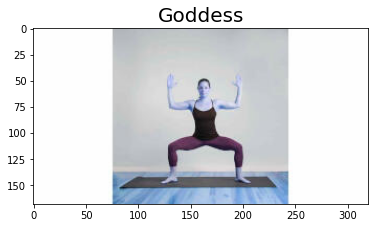

In [12]:
# checking train path
x=50
image = cv2.imread(X_train[x]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(y_train[x], fontsize = 20)
#plt.axis('on')
plt.show()

In [37]:
BATCH_SIZE = 12
IMG_SIZE = (224, 224)
directory = "../content/YogaPoses/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 988 files belonging to 5 classes.
Using 791 files for training.
Found 988 files belonging to 5 classes.
Using 197 files for validation.


['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']


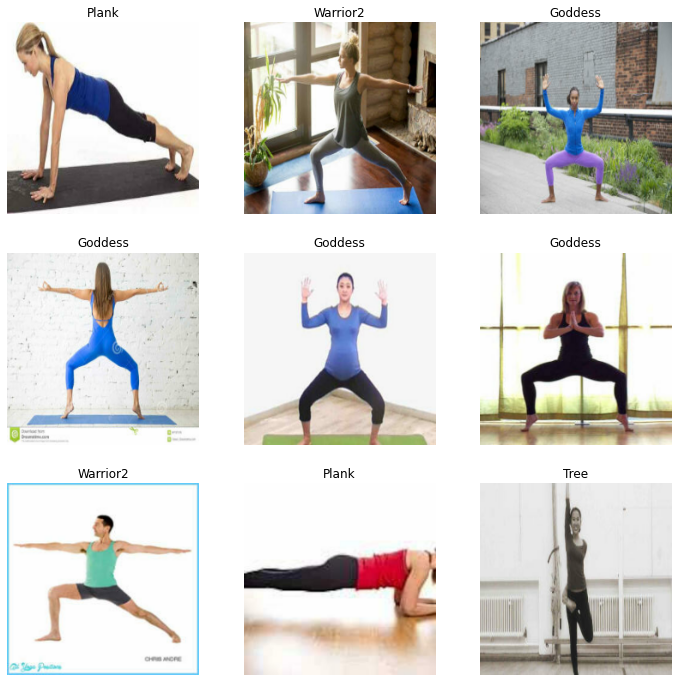

In [47]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [16]:
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    ### START CODE HERE
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    ### END CODE HERE
    
    return data_augmentation

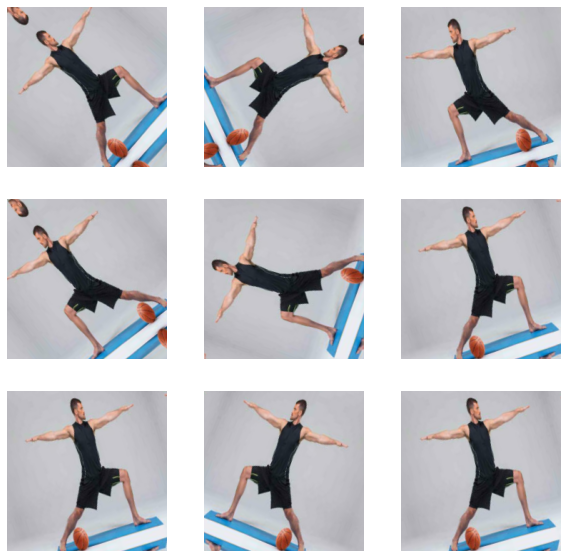

In [17]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [18]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [19]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [39]:
def alpaca_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    ''' Define a tf.keras model for binary classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
    
    
    input_shape = image_shape + (3,)
    
    ### START CODE HERE
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    
    # freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape) 
    
    # apply data augmentation to the inputs
    x = data_augmentation(inputs)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(x) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    # include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # use a prediction layer with one neuron (as a binary classifier only needs one)
    #outputs = tfl.Dense(units=5)(x)
    outputs = tfl.Dense(units=5, activation='softmax')(x)
    
    
    ### END CODE HERE
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [40]:
model2 = alpaca_model(IMG_SIZE, data_augmentation)

In [50]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [51]:
initial_epochs = 5
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
66/66 [==============================] - 37s 502ms/step - loss: 1.3948 - accuracy: 0.5828 - val_loss: 0.6827 - val_accuracy: 0.7462
Epoch 2/5
66/66 [==============================] - 32s 482ms/step - loss: 0.8279 - accuracy: 0.7434 - val_loss: 0.6374 - val_accuracy: 0.7614
Epoch 3/5
66/66 [==============================] - 32s 485ms/step - loss: 0.6475 - accuracy: 0.8040 - val_loss: 0.6422 - val_accuracy: 0.8122
Epoch 4/5
66/66 [==============================] - 32s 486ms/step - loss: 0.7368 - accuracy: 0.7990 - val_loss: 0.4959 - val_accuracy: 0.8629
Epoch 5/5
66/66 [==============================] - 32s 486ms/step - loss: 0.6116 - accuracy: 0.8394 - val_loss: 0.4620 - val_accuracy: 0.8985


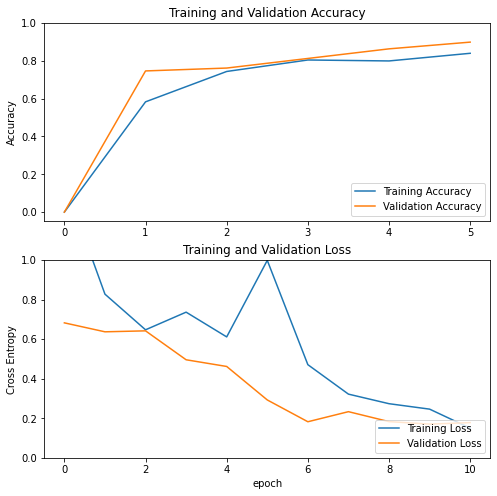

In [58]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [54]:
# UNQ_C3
base_model = model2.layers[4]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = True
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.SparseCategoricalCrossentropy()
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [55]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
66/66 [==============================] - 124s 2s/step - loss: 0.9988 - accuracy: 0.6877 - val_loss: 0.2927 - val_accuracy: 0.8934
Epoch 6/10
66/66 [==============================] - 117s 2s/step - loss: 0.4711 - accuracy: 0.8243 - val_loss: 0.1824 - val_accuracy: 0.9239
Epoch 7/10
66/66 [==============================] - 117s 2s/step - loss: 0.3221 - accuracy: 0.8824 - val_loss: 0.2334 - val_accuracy: 0.9289
Epoch 8/10
66/66 [==============================] - 116s 2s/step - loss: 0.2737 - accuracy: 0.9153 - val_loss: 0.1830 - val_accuracy: 0.9492
Epoch 9/10
66/66 [==============================] - 118s 2s/step - loss: 0.2462 - accuracy: 0.9153 - val_loss: 0.1705 - val_accuracy: 0.9442
Epoch 10/10
66/66 [==============================] - 117s 2s/step - loss: 0.1499 - accuracy: 0.9456 - val_loss: 0.1781 - val_accuracy: 0.9594


In [56]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

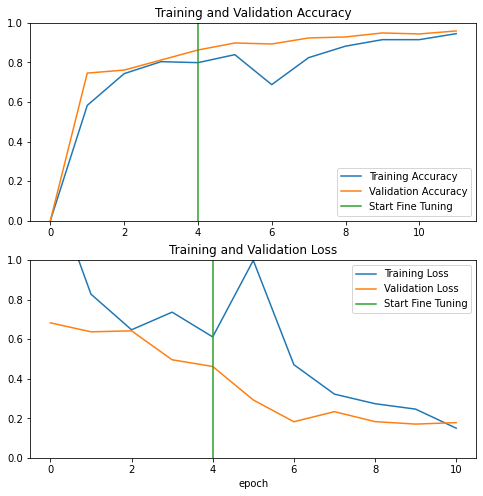

In [57]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()